<a href="https://colab.research.google.com/github/MemoJmz/Python-Tutorial/blob/main/Mandelbrot_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def get_iter(c:complex, thresh:int =4, max_steps:int =25) -> int:
    # z_n (n) = (z_(n-1))^2 + c
    # z_0 = c
    z = c
    i = 1
    while i < max_steps and (z*z.conjugate()).real < thresh:
        z = z*z + c
        i += 1

        return i


def plotter(n, thresh, max_steps=25):
    mx = 2.48 / (n-1)
    my = 2.26 / (n-1)
    mapper = lambda x,y: ( mx*x - 2, my*y - 1.13)
    img = np.full((n,n), 255)
    for x in range(n):
        for y in range(n):
            it = get_iter(complex(*mapper(x,y)), thresh=thresh, max_steps=max_steps)
            img[y][x] = 255 - it

    return img


if __name__ == "__main__":
    n = 1000
    img = plotter(n, thresh=4, max_steps=50)
    plt.imshow(img, cmap="plasma")
    plt.axis("off")
    plt.show()

TypeError: ignored

In [33]:
# Mandelbrot fractal
# FB - 201003254
from PIL import Image
  
# drawing area
xa = -2.0
xb = 1.0
ya = -1.5
yb = 1.5
  
# max iterations allowed
maxIt = 255 
  
# image size
imgx = 512
imgy = 512
image = Image.new("RGB", (imgx, imgy))
  
for y in range(imgy):
    zy = y * (yb - ya) / (imgy - 1)  + ya
    for x in range(imgx):
        zx = x * (xb - xa) / (imgx - 1)  + xa
        z = zx + zy * 1j
        c = z
        for i in range(maxIt):
            if abs(z) > 2.0: break
            z = z * z + c
        image.putpixel((x, y), (i % 4 * 64, i % 8 * 32, i % 16 * 16))
  
image.show()

In [34]:
# Mandelbrot Set
# {n} such taht z -> z*z + n
# remains finite

# n = 0 -> 0, 0, 0, ...
# n = 1 -> 0, 1, 2, 5, 26, ... explotes
# n = -1 -> 0, -1 does not explotes (remains finite)
# n = -3 -> explotes

In [35]:
n = -3
z = 0

In [44]:
z = z * z + n
z

3743418362887760317407541271559358491868341997566

In [45]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
x = numpy.arange(-3, 3, 1)
z = numpy.zeros_like(x)
arr = [x]
for i in range(10):
  z = z*z + x
  arr.append(numpy.abs(z))

In [47]:
arr

[array([-3, -2, -1,  0,  1,  2]),
 array([3, 2, 1, 0, 1, 2]),
 array([6, 2, 0, 0, 2, 6]),
 array([33,  2,  1,  0,  5, 38]),
 array([1086,    2,    0,    0,   26, 1446]),
 array([1179393,       2,       1,       0,     677, 2090918]),
 array([1390967848446,             2,             0,             0,
               458330, 4371938082726]),
 array([4803239468103370753,                   2,                   1,
                          0,        210066388901, 8919542782688501670]),
 array([5896182132306350078,                   2,                   0,
                          0, 3275921592928522330, 8557206234556948570]),
 array([6885468643577020417,                   2,                   1,
                          0, 6521269100592521125, 7113761450777878438]),
 array([ 598872920952963074,                   2,                   0,
                          0, 4807096813913104474, 1704545774845796262])]

In [48]:
for line in arr:
  print("\t\t".join(map(str,line)))

-3		-2		-1		0		1		2
3		2		1		0		1		2
6		2		0		0		2		6
33		2		1		0		5		38
1086		2		0		0		26		1446
1179393		2		1		0		677		2090918
1390967848446		2		0		0		458330		4371938082726
4803239468103370753		2		1		0		210066388901		8919542782688501670
5896182132306350078		2		0		0		3275921592928522330		8557206234556948570
6885468643577020417		2		1		0		6521269100592521125		7113761450777878438
598872920952963074		2		0		0		4807096813913104474		1704545774845796262


In [49]:
x = numpy.arange(-3, 3, 0.01)
z = numpy.zeros_like(x)
arr = [x]
for i in range(100):
  z = z*z + x
  arr.append(numpy.abs(z)<10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


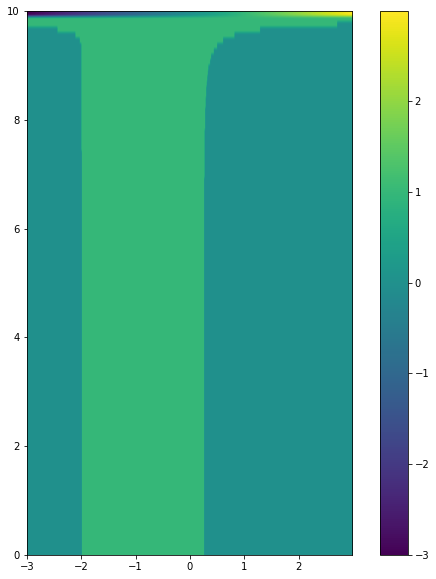

In [50]:
figure(figsize=(10,10))
imshow(arr, extent=(x.min(), x.max(), 0, 10))
colorbar()

In [51]:
min(x[arr[-1]])

-1.9900000000000215

In [52]:
max(x[arr[-1]])

0.24999999999993072

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


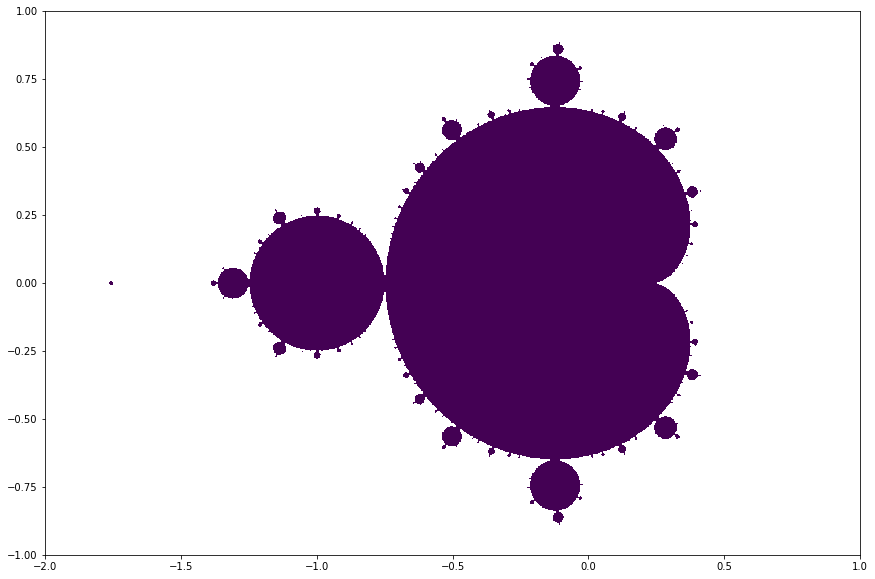

In [53]:
x, X = -2, 1
y, Y = -1, 1

delta = 0.001

re, im = numpy.mgrid[x:X:delta, y:Y:delta]
c = (re + 1j*im).reshape(im.shape[0], -1).T

z = numpy.zeros_like(c)
for i in range(100):
  z = z*z + c   # Mandelbrot Equation

figure(figsize=(20, 10))
imshow(numpy.absolute(z), extent=(x, X, y, Y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in absolute
  del sys.path[0]


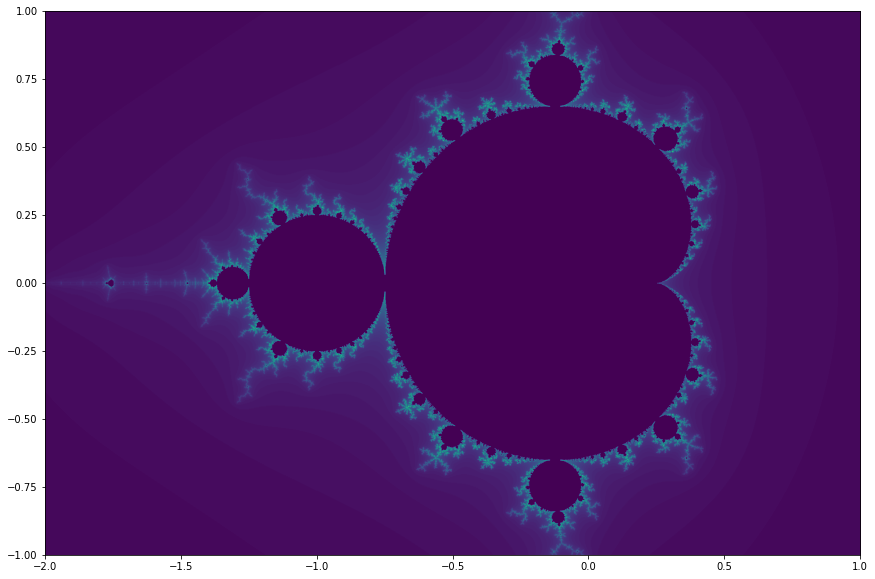

In [54]:
x, X = -2, 1
y, Y = -1, 1

delta = 0.001

re, im = numpy.mgrid[x:X:delta, y:Y:delta]
c = (re + 1j*im).reshape(im.shape[0], -1).T

z = numpy.zeros_like(c)
escape = numpy.zeros_like(numpy.absolute(c))
for i in range(100):
  z = z*z + c   # Mandelbrot Equation
  idx = (numpy.absolute(z) > 4 ) & (escape == 0)
  escape[idx] = i

figure(figsize=(20, 10))
imshow(escape, extent=(x, X, y, Y))

In [56]:
from matplotlib import pyplot

def plot_mandelbrot(x, X, y, Y):
  delta = (X-x)/1000
  re, im = numpy.mgrid[x:X:delta, y:Y:delta]
  c = (re + 1j*im).reshape(im.shape[0], -1).T

  z = numpy.zeros_like(c)
  escape = numpy.zeros_like(numpy.absolute(c))
  for i in range(100):
    z = z*z + c   # Mandelbrot Equation
    idx = (numpy.absolute(z) > 4 ) & (escape == 0)
    escape[idx] = i

  figure(figsize=(20, 10))
  imshow(escape, extent=(x, X, y, Y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in absolute
  if sys.path[0] == '':


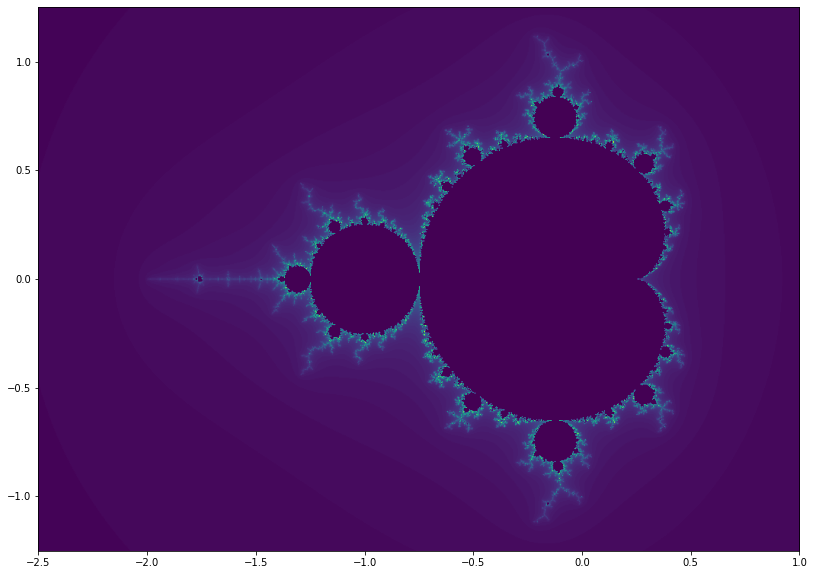

In [57]:
plot_mandelbrot(-2.5, 1, -1.25, 1.25)

In [58]:
def plot_mandelbrot_at(x, y, D):
  return plot_mandelbrot(x-D, x+D, y-D, y+D)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in absolute
  if sys.path[0] == '':


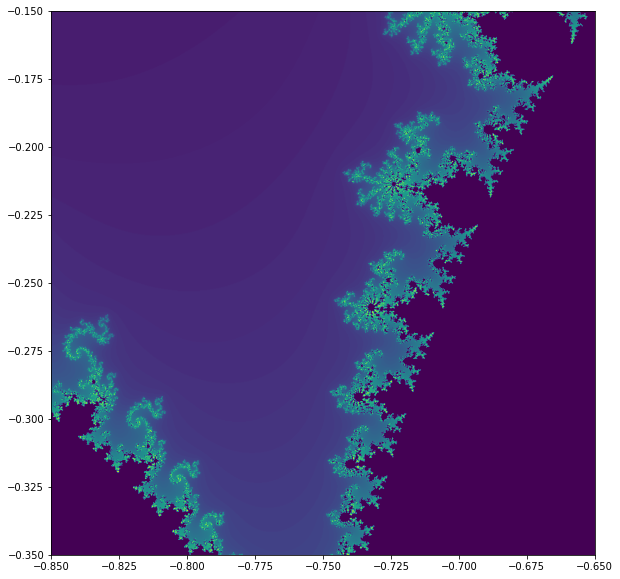

In [59]:
plot_mandelbrot_at(-.75, -.25, .1)